In [1]:
from datetime import date
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
import os, shutil
from glob import glob
%matplotlib inline  
import os
from shapely.geometry import Polygon


In [284]:
west=gpd.read_file('west_EU.geojson')

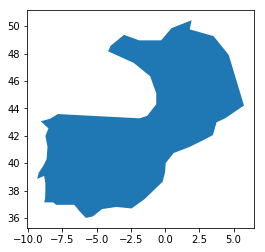

In [285]:
west.plot()

In [286]:
west.crs

{'init': 'epsg:4326'}

In [287]:
wrs = gpd.GeoDataFrame.from_file("WRS2_descending.shp")

In [289]:
wrs.head(5)

,AREA,PERIMETER,PR_,PR_ID,RINGS_OK,RINGS_NOK,PATH,ROW,MODE,SEQUENCE,WRSPR,PR,ACQDayL7,ACQDayL8,geometry
0,15.74326,26.98611,1.0,1.0,1,0,13,1,D,2233,013001,013001,1,9,"POLYGON ((-10.80341356392465 80.9888, -8.97406..."
1,14.55366,25.84254,2.0,2.0,1,0,13,2,D,2234,013002,013002,1,9,POLYGON ((-29.24250366707619 80.18681161921363...
2,13.37247,24.20303,3.0,3.0,1,0,13,3,D,2235,013003,013003,1,9,POLYGON ((-24.04205646041896 79.12261247629547...
3,12.26691,22.40265,4.0,4.0,1,0,13,4,D,2236,013004,013004,1,9,POLYGON ((-36.66813132081753 77.46094098591608...
4,11.26511,20.64284,5.0,5.0,1,0,13,5,D,2237,013005,013005,1,9,POLYGON ((-44.11209517917457 76.93655561966702...


In [290]:
wrs_intersection = wrs[wrs.intersects(west.geometry[0])]

In [291]:
wrs_intersection

,AREA,PERIMETER,PR_,PR_ID,RINGS_OK,RINGS_NOK,PATH,ROW,MODE,SEQUENCE,WRSPR,PR,ACQDayL7,ACQDayL8,geometry
1389,3.87780,8.18349,2754.0,2754.0,1,0,198,26,D,1514,198026,198026,1,9,"POLYGON ((2.341276859629053 48.29702013633363,..."
1390,3.77399,8.03991,2755.0,2755.0,1,0,198,27,D,1515,198027,198027,1,9,"POLYGON ((1.823011577358155 46.87432828913458,..."
1391,3.67785,7.90752,2756.0,2756.0,1,0,198,28,D,1516,198028,198028,1,9,"POLYGON ((1.325549447552162 45.44983010010615,..."
1392,3.58840,7.78501,2757.0,2757.0,1,0,198,29,D,1517,198029,198029,1,9,POLYGON ((0.8468214953196805 44.02363566574142...
1393,3.50548,7.67181,2758.0,2758.0,1,0,198,30,D,1518,198030,198030,1,9,POLYGON ((0.6792725066251118 42.55299765928576...
1394,3.42826,7.56682,2759.0,2759.0,1,0,198,31,D,1519,198031,198031,1,9,POLYGON ((-0.06123615809528411 41.166545586119...
1395,3.35637,7.46943,2760.0,2760.0,1,0,198,32,D,1520,198032,198032,1,9,POLYGON ((-0.4935488089147577 39.7358503582929...
1396,3.28944,7.37900,2761.0,2761.0,1,0,198,33,D,1521,198033,198033,1,9,POLYGON ((0.1508137047581101 38.14913271882588...
1397,3.22728,7.29517,2762.0,2762.0,1,0,198,34,D,1522,198034,198034,1,9,"POLYGON ((0.7430020755503908 36.6667583744119,..."
3377,3.50554,7.67189,3254.0,3254.0,1,0,205,30,D,5238,205030,205030,2,10,POLYGON ((-10.13619048618033 42.55299615632778...


In [292]:
len(wrs_intersection)

77

In [293]:
paths, rows = wrs_intersection['PATH'].values, wrs_intersection['ROW'].values

In [294]:
paths, rows

(array([198, 198, 198, 198, 198, 198, 198, 198, 198, 205, 205, 196, 196,
        196, 196, 196, 203, 203, 203, 203, 203, 203, 203, 201, 201, 201,
        201, 201, 201, 201, 201, 201, 201, 199, 199, 199, 199, 199, 199,
        199, 199, 199, 199, 199, 197, 197, 197, 197, 197, 197, 197, 204,
        204, 204, 204, 204, 195, 195, 202, 202, 202, 202, 202, 202, 202,
        202, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200], dtype=int64),
 array([26, 27, 28, 29, 30, 31, 32, 33, 34, 30, 31, 27, 28, 29, 30, 31, 26,
        27, 30, 31, 32, 33, 34, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 26, 27, 28, 29, 30, 31, 32,
        30, 31, 32, 33, 34, 29, 30, 26, 27, 30, 31, 32, 33, 34, 35, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35], dtype=int64))

In [295]:
paths_rows=[]
for i in range(len(paths)):
    intersectimage=[paths[i],rows[i]]
    paths_rows.append(intersectimage)

In [296]:
# Get the center of the map
xy = np.asarray(west.centroid[0].xy).squeeze()
center = list(xy[::-1])



In [299]:
zoom = 5

# Create the most basic OSM folium map
m = folium.Map(location=center, zoom_start=zoom)


In [300]:
# Add the bounds GeoDataFrame in red
m.add_child(folium.GeoJson(west.__geo_interface__, name='Area of Study', 
                           style_function=lambda x: {'color': 'red', 'alpha': 0}))
m

In [301]:
# Iterate through each Polygon of paths and rows intersecting the area
for i, row in wrs_intersection.iterrows():

    # Create a string for the name containing the path and row of this Polygon
    name = 'path: %03d, row: %03d' % (row.PATH, row.ROW)
    # Create the folium geometry of this Polygon 
    g = folium.GeoJson(row.geometry.__geo_interface__, name=name)
    # Add a folium Popup object with the name string
    g.add_child(folium.Popup(name))
    # Add the object to the map
    g.add_to(m)

    

In [302]:
folium.LayerControl().add_to(m)
m.save('wrs.html')
m

In [303]:
paths

array([198, 198, 198, 198, 198, 198, 198, 198, 198, 205, 205, 196, 196,
       196, 196, 196, 203, 203, 203, 203, 203, 203, 203, 201, 201, 201,
       201, 201, 201, 201, 201, 201, 201, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 197, 197, 197, 197, 197, 197, 197, 204,
       204, 204, 204, 204, 195, 195, 202, 202, 202, 202, 202, 202, 202,
       202, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200], dtype=int64)

In [304]:
for i, (path, row) in enumerate(zip(paths, rows)):
    print('Image', i+1, ' - path:', path, 'row:', row)


Image 1  - path: 198 row: 26
Image 2  - path: 198 row: 27
Image 3  - path: 198 row: 28
Image 4  - path: 198 row: 29
Image 5  - path: 198 row: 30
Image 6  - path: 198 row: 31
Image 7  - path: 198 row: 32
Image 8  - path: 198 row: 33
Image 9  - path: 198 row: 34
Image 10  - path: 205 row: 30
Image 11  - path: 205 row: 31
Image 12  - path: 196 row: 27
Image 13  - path: 196 row: 28
Image 14  - path: 196 row: 29
Image 15  - path: 196 row: 30
Image 16  - path: 196 row: 31
Image 17  - path: 203 row: 26
Image 18  - path: 203 row: 27
Image 19  - path: 203 row: 30
Image 20  - path: 203 row: 31
Image 21  - path: 203 row: 32
Image 22  - path: 203 row: 33
Image 23  - path: 203 row: 34
Image 24  - path: 201 row: 25
Image 25  - path: 201 row: 26
Image 26  - path: 201 row: 27
Image 27  - path: 201 row: 28
Image 28  - path: 201 row: 30
Image 29  - path: 201 row: 31
Image 30  - path: 201 row: 32
Image 31  - path: 201 row: 33
Image 32  - path: 201 row: 34
Image 33  - path: 201 row: 35
Image 34  - path: 1

In [305]:
s3_scenes = pd.read_csv('http://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz', compression='gzip')

In [306]:
s3_scenes.head()

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
0,LC08_L1TP_149039_20170411_20170415_01_T1,LC81490392017101LGN00,2017-04-11 05:36:29.349932,0.00,L1TP,149,39,29.22165,72.41205,31.34742,74.84666,https://s3-us-west-2.amazonaws.com/landsat-pds...
1,LC08_L1TP_012001_20170411_20170415_01_T1,LC80120012017101LGN00,2017-04-11 15:14:40.001201,0.15,L1TP,12,1,79.51504,-22.06995,81.90314,-7.44339,https://s3-us-west-2.amazonaws.com/landsat-pds...
2,LC08_L1TP_012002_20170411_20170415_01_T1,LC80120022017101LGN00,2017-04-11 15:15:03.871058,0.38,L1TP,12,2,78.74882,-29.24387,81.14549,-15.04330,https://s3-us-west-2.amazonaws.com/landsat-pds...
3,LC08_L1TP_012010_20170411_20170415_01_T1,LC80120102017101LGN00,2017-04-11 15:18:14.918879,0.02,L1TP,12,10,69.67856,-56.04655,72.02949,-48.71678,https://s3-us-west-2.amazonaws.com/landsat-pds...
4,LC08_L1TP_012011_20170411_20170415_01_T1,LC80120112017101LGN00,2017-04-11 15:18:38.780265,10.65,L1TP,12,11,68.38187,-57.33186,70.76840,-51.13822,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [320]:
min_date='2018-04-01'
max_date='2018-07-30'

In [274]:
s3_scenes[(s3_scenes['acquisitionDate']>=min_date )&(s3_scenes['acquisitionDate']<=max_date) &(s3_scenes['path']==200) & (s3_scenes['row']==30)]

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
476558,LC08_L1TP_200030_20180505_20180505_01_RT,LC82000302018125LGN00,2018-05-05 10:47:43.779004,66.60,L1TP,200,30,42.09746,-2.77009,44.24669,0.01590,https://s3-us-west-2.amazonaws.com/landsat-pds...
492319,LC08_L1TP_200030_20180505_20180517_01_T1,LC82000302018125LGN00,2018-05-05 10:47:43.779004,66.59,L1TP,200,30,42.09746,-2.77009,44.24669,0.01590,https://s3-us-west-2.amazonaws.com/landsat-pds...
493258,LC08_L1TP_200030_20180505_20180517_01_T1,LC82000302018125LGN00,2018-05-05 10:47:43.779004,66.59,L1TP,200,30,42.09746,-2.77009,44.24669,0.01590,https://s3-us-west-2.amazonaws.com/landsat-pds...
495644,LC08_L1TP_200030_20180521_20180521_01_RT,LC82000302018141LGN00,2018-05-21 10:47:32.426062,36.34,L1TP,200,30,42.09746,-2.77372,44.24670,0.01590,https://s3-us-west-2.amazonaws.com/landsat-pds...
513608,LC08_L1GT_200030_20180606_20180606_01_RT,LC82000302018157LGN00,2018-06-06 10:47:23.166859,86.37,L1GT,200,30,42.09843,-2.70836,44.24654,0.08124,https://s3-us-west-2.amazonaws.com/landsat-pds...
513750,LC08_L1TP_200030_20180521_20180605_01_T1,LC82000302018141LGN00,2018-05-21 10:47:32.426062,36.34,L1TP,200,30,42.09746,-2.77372,44.24670,0.01590,https://s3-us-west-2.amazonaws.com/landsat-pds...
535609,LC08_L1TP_200030_20180622_20180623_01_RT,LC82000302018173LGN00,2018-06-22 10:47:34.428219,40.71,L1TP,200,30,42.09592,-2.71563,44.24656,0.07386,https://s3-us-west-2.amazonaws.com/landsat-pds...
547688,LC08_L1TP_200030_20180622_20180703_01_T1,LC82000302018173LGN00,2018-06-22 10:47:34.428219,40.71,L1TP,200,30,42.09592,-2.71563,44.24656,0.07386,https://s3-us-west-2.amazonaws.com/landsat-pds...
553344,LC08_L1TP_200030_20180622_20180703_01_T1,LC82000302018173LGN00,2018-06-22 10:47:34.428219,40.71,L1TP,200,30,42.09592,-2.71563,44.24656,0.07386,https://s3-us-west-2.amazonaws.com/landsat-pds...
560185,LC08_L1TP_200030_20180708_20180708_01_RT,LC82000302018189LGN00,2018-07-08 10:47:43.234722,23.45,L1TP,200,30,42.09592,-2.71563,44.24656,0.07386,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [321]:
# Empty list to add the images
bulk_list = []

# Iterate through paths and rows
for path, row in zip(paths, rows):

    print('Path:',path, 'Row:', row)

    # Filter the Landsat Amazon S3 table for images matching path, row, cloudcover and processing state.
    scenes = s3_scenes[(s3_scenes.path == path) & (s3_scenes.row == row) &
                       ((s3_scenes['acquisitionDate']>=min_date )&(s3_scenes['acquisitionDate']<=max_date ))&
                       (s3_scenes.cloudCover <= 80) & 
                       (~s3_scenes.productId.str.contains('_T2')) &
                       (~s3_scenes.productId.str.contains('_RT'))]
    print(' Found {} images\n'.format(len(scenes)))

    # If any scenes exists, select the one that have the minimum cloudCover.
    if len(scenes):
        scene = scenes.sort_values('cloudCover').iloc[0]

    # Add the selected scene to the bulk download list.
    bulk_list.append(scene)


Path: 198 Row: 26
 Found 10 images

Path: 198 Row: 27
 Found 11 images

Path: 198 Row: 28
 Found 11 images

Path: 198 Row: 29
 Found 10 images

Path: 198 Row: 30
 Found 11 images

Path: 198 Row: 31
 Found 10 images

Path: 198 Row: 32
 Found 12 images

Path: 198 Row: 33
 Found 12 images

Path: 198 Row: 34
 Found 11 images

Path: 205 Row: 30
 Found 4 images

Path: 205 Row: 31
 Found 3 images

Path: 196 Row: 27
 Found 8 images

Path: 196 Row: 28
 Found 8 images

Path: 196 Row: 29
 Found 10 images

Path: 196 Row: 30
 Found 10 images

Path: 196 Row: 31
 Found 0 images

Path: 203 Row: 26
 Found 7 images

Path: 203 Row: 27
 Found 8 images

Path: 203 Row: 30
 Found 9 images

Path: 203 Row: 31
 Found 12 images

Path: 203 Row: 32
 Found 10 images

Path: 203 Row: 33
 Found 10 images

Path: 203 Row: 34
 Found 9 images

Path: 201 Row: 25
 Found 7 images

Path: 201 Row: 26
 Found 6 images

Path: 201 Row: 27
 Found 6 images

Path: 201 Row: 28
 Found 5 images

Path: 201 Row: 30
 Found 5 images

Path: 

In [323]:
bulk_frame = pd.concat(bulk_list, 1).T
bulk_frame

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
487947,LC08_L1TP_198026_20180507_20180517_01_T1,LC81980262018127LGN00,2018-05-07 10:33:45.397311,0.04,L1TP,198,26,47.7726,2.23646,49.9297,5.39587,https://s3-us-west-2.amazonaws.com/landsat-pds...
488928,LC08_L1TP_198027_20180507_20180517_01_T1,LC81980272018127LGN00,2018-05-07 10:34:09.279878,0.54,L1TP,198,27,46.3606,1.70564,48.5082,4.8069,https://s3-us-west-2.amazonaws.com/landsat-pds...
470370,LC08_L1TP_198028_20180421_20180502_01_T1,LC81980282018111LGN00,2018-04-21 10:34:42.023914,1.08,L1TP,198,28,44.9416,1.21092,47.0844,4.25623,https://s3-us-west-2.amazonaws.com/landsat-pds...
471614,LC08_L1TP_198029_20180421_20180502_01_T1,LC81980292018111LGN00,2018-04-21 10:35:05.906481,0.22,L1TP,198,29,43.5101,0.7255,45.6583,3.71777,https://s3-us-west-2.amazonaws.com/landsat-pds...
473806,LC08_L1TP_198030_20180421_20180502_01_T1,LC81980302018111LGN00,2018-04-21 10:35:29.793283,2,L1TP,198,30,42.0795,0.25535,44.2302,3.19716,https://s3-us-west-2.amazonaws.com/landsat-pds...
454545,LC08_L1TP_198031_20180405_20180417_01_T1,LC81980312018095LGN00,2018-04-05 10:36:03.231766,1.63,L1TP,198,31,40.6502,-0.1868,42.8006,2.70293,https://s3-us-west-2.amazonaws.com/landsat-pds...
455775,LC08_L1TP_198032_20180405_20180417_01_T1,LC81980322018095LGN00,2018-04-05 10:36:27.114334,0.07,L1TP,198,32,39.2167,-0.62517,41.3693,2.21869,https://s3-us-west-2.amazonaws.com/landsat-pds...
454546,LC08_L1TP_198033_20180405_20180417_01_T1,LC81980332018095LGN00,2018-04-05 10:36:51.001137,0.2,L1TP,198,33,37.7848,-1.04693,39.9396,1.7532,https://s3-us-west-2.amazonaws.com/landsat-pds...
451650,LC08_L1TP_198034_20180405_20180417_01_T1,LC81980342018095LGN00,2018-04-05 10:37:14.887939,0.33,L1TP,198,34,36.393,-1.36516,38.5358,1.16491,https://s3-us-west-2.amazonaws.com/landsat-pds...
510959,LC08_L1TP_205030_20180524_20180605_01_T1,LC82050302018144LGN00,2018-05-24 11:18:24.011768,43.6,L1TP,205,30,42.1032,-10.539,44.2366,-7.66356,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [325]:
bulk_list_new=[]
for index,i in enumerate(bulk_list,0):
    if i.productId!=bulk_list[index-1].productId:
        bulk_list_new.append(i)
        
len(bulk_list_new)

76

In [326]:
bulk_frame_result = pd.concat(bulk_list_new, 1).T


In [327]:
bulk_frame_result.sort_values('cloudCover',ascending=False)

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
510959,LC08_L1TP_205030_20180524_20180605_01_T1,LC82050302018144LGN00,2018-05-24 11:18:24.011768,43.6,L1TP,205,30,42.1032,-10.539,44.2366,-7.66356,https://s3-us-west-2.amazonaws.com/landsat-pds...
582460,LC08_L1TP_205031_20180711_20180717_01_T1,LC82050312018192LGN00,2018-07-11 11:19:02.592188,39.66,L1TP,205,31,40.6708,-10.9361,42.8097,-8.10419,https://s3-us-west-2.amazonaws.com/landsat-pds...
570266,LC08_L1TP_199027_20180701_20180716_01_T1,LC81990272018182LGN00,2018-07-01 10:40:17.221675,35.07,L1TP,199,27,46.3346,0.17471,48.4997,3.37572,https://s3-us-west-2.amazonaws.com/landsat-pds...
570817,LC08_L1TP_199026_20180701_20180716_01_T1,LC81990262018182LGN00,2018-07-01 10:39:53.330637,17.98,L1TP,199,26,47.7603,0.70277,49.9203,3.96642,https://s3-us-west-2.amazonaws.com/landsat-pds...
594262,LC08_L1TP_197027_20180719_20180731_01_T1,LC81970272018200LGN00,2018-07-19 10:28:03.897333,11.94,L1TP,197,27,46.3522,3.35644,48.5176,6.37027,https://s3-us-west-2.amazonaws.com/landsat-pds...
511023,LC08_L1TP_196029_20180525_20180605_01_T1,LC81960292018145LGN00,2018-05-25 10:22:22.048602,11.28,L1TP,196,29,43.517,3.8632,45.6748,6.70555,https://s3-us-west-2.amazonaws.com/landsat-pds...
546701,LC08_L1TP_195029_20180619_20180703_01_T1,LC81950292018170LGN00,2018-06-19 10:16:14.545592,10.33,L1TP,195,29,43.4856,5.36668,45.6501,8.43684,https://s3-us-west-2.amazonaws.com/landsat-pds...
507198,LC08_L1TP_204030_20180517_20180604_01_T1,LC82040302018137LGN00,2018-05-17 11:12:18.773031,9.9,L1TP,204,30,42.0993,-8.9516,44.2442,-6.16176,https://s3-us-west-2.amazonaws.com/landsat-pds...
596046,LC08_L1TP_197026_20180719_20180731_01_T1,LC81970262018200LGN00,2018-07-19 10:27:40.010530,9.21,L1TP,197,26,47.7617,3.86713,49.9395,6.95688,https://s3-us-west-2.amazonaws.com/landsat-pds...
832843,LC08_L1TP_203026_20180713_20180730_01_T1,LC82030262018194LGN00,2018-07-13 11:04:42.425216,8.14,L1TP,203,26,47.7567,-5.48108,49.9192,-2.20575,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [328]:
zoom = 6
# Create the new map from selected images
n = folium.Map(location=center, zoom_start=zoom)

In [330]:
# Iterate through each Polygon of paths and rows intersecting the area
for i, row in bulk_frame_result.iterrows():
    #image=bulk_frame_result.loc[i]
    
    lat_point_list = [row.max_lat, row.max_lat, row.min_lat,row.min_lat] 
    lon_point_list = [row.min_lon, row.max_lon, row.max_lon,row.min_lon] 

    polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
    crs = {'init': 'epsg:4326'}
    polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
    
    # Create a string for the name containing the path and row of this Polygon
    name = 'path: %03d, row: %03d' % (row.path, row.row)
    # Create the folium geometry of this Polygon 
    g = folium.GeoJson(polygon.__geo_interface__, name=name)
    # Add a folium Popup object with the name string
    g.add_child(folium.Popup(name))
    # Add the object to the map
    g.add_to(n)
    

In [331]:
folium.LayerControl().add_to(n)
n.save('results.html')
n

In [2]:
#below code, you can download the landsat image's band depends on your application 
#if you want to use UTM image, add command sigh to begining of the  gdal.Warp() blog

In [ ]:
# Import requests and beautiful soup
import gdal
import time
import requests

download_path=r'../data/'
# For each row
start_time = time.time()
for i, row in bulk_frame_result.iterrows():

    # Print some the product ID
    print('\n', 'EntityId:', row.productId, '\n')
    print(' Checking content: ', '\n')
    response = requests.get(row.download_url)
    # Request the html text of the download_url from the amazon server. 
    # download_url example: https://landsat-pds.s3.amazonaws.com/c1/L8/139/045/LC08_L1TP_139045_20170304_20170316_01_T1/index.html
    #response = requests.get(row.download_url)

    # If the response status code is fine (200)
    if response.status_code == 200:
        
        url = row.download_url[:-10]
        redband = row.productId+'_B{}.TIF'.format(4)
        nirband = row.productId+'_B{}.TIF'.format(5)
        swirband1 = row.productId+'_B{}.TIF'.format(6)
        swirband2 = row.productId+'_B{}.TIF'.format(7)
        
        image_path=download_path+redband
        image_path2=download_path+nirband
        image_path3=download_path+swirband1
        image_path4=download_path+swirband2
        
        print(image_path)
        
        response = requests.get(url+redband, stream=True)
        response2 = requests.get(url+nirband, stream=True)
        response3 = requests.get(url+swirband1, stream=True)
        response4 = requests.get(url+swirband2, stream=True)
        
        translate_path=download_path+'4326/redband/'+redband                
        translate_path2=download_path+'4326/nirband/'+nirband
        translate_path3=download_path+'4326/swir1/'+swirband1
        translate_path4=download_path+'4326/swir2/'+swirband2
       
        with open(os.path.join(image_path), 'wb') as output:
            shutil.copyfileobj(response.raw, output)
        gdal.Warp(translate_path ,image_path, format = 'GTiff', dstSRS = 'EPSG:4326',srcNodata = 0,dstNodata=0)   
        
        with open(os.path.join(image_path2), 'wb') as output2:
            shutil.copyfileobj(response2.raw, output2)
        
        gdal.Warp(translate_path2 ,image_path2, format = 'GTiff', dstSRS = 'EPSG:4326',srcNodata = 0,dstNodata=0)
        
        with open(os.path.join(image_path3), 'wb') as output3:
            shutil.copyfileobj(response3.raw, output3)
        
        gdal.Warp(translate_path3 ,image_path3, format = 'GTiff', dstSRS = 'EPSG:4326',srcNodata = 0,dstNodata=0)

        with open(os.path.join(image_path4), 'wb') as output4:
            shutil.copyfileobj(response4.raw, output4)
        
        gdal.Warp(translate_path4 ,image_path4, format = 'GTiff', dstSRS = 'EPSG:4326',srcNodata = 0,dstNodata=0)
   
        
        del response
        del response2
        del response3
        del response4
        
        
print("--- %s seconds ---" % (time.time() - start_time))        

        
        
   